<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/Jan_week2_MtFuji_decendant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 富士山下山問題

## 【問題1】データの可視化

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [ ]:
fuji.shape

(300, 5)

In [ ]:
fuji

array([[    0.      ,    35.134141,   139.132082,     0.      ,
            0.      ],
       [    1.      ,    35.135826,   139.129202,     0.      ,
          322.      ],
       [    2.      ,    35.13751 ,   139.126322,     0.      ,
          644.      ],
       ...,
       [  297.      ,    35.631284,   138.271368,  1973.99    ,
        95698.      ],
       [  298.      ,    35.632947,   138.268452,  1841.36    ,
        96020.      ],
       [  299.      ,    35.63461 ,   138.265536,  1725.8     ,
        96343.      ]])

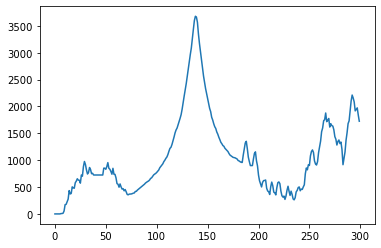

In [ ]:
plt.plot(fuji[:,0],fuji[:,3])

## 【問題2】ある地点の勾配を計算する関数を作成

In [ ]:
def decend_func(fuji, x):
    
    return (fuji[x, 3] - fuji[x-1, 3]) / (fuji[x, 0] - fuji[x-1, 0])


In [ ]:
print(decend_func(fuji, 10))

117.15


## 【問題3】移動先の地点を計算する関数を作成

In [ ]:
def next_point_culc(fuji, x, alpha):
    
    return round((x - alpha * decend_func(fuji, x)),0).astype(int)

In [ ]:
print(next_point_culc(fuji, 128, 0.05))

122


## 【問題4】山を下る関数を作成

In [ ]:
def descent_fuji(x, alpha = 0.05, Itr = 10000):

    i = 0
    start = x
    pref_point = start
    next_point = start
    point = [start]

    while (i <= Itr):
    
        next_point = next_point_culc(fuji, next_point, alpha)
        if next_point < pref_point:
            point.append(next_point)
            pref_point = next_point
            i += 1
        else:
            i = Itr + 1
        
    return point

In [ ]:
descent_fuji(136)

[136,
 128,
 122,
 119,
 116,
 113,
 110,
 109,
 107,
 105,
 104,
 103,
 101,
 100,
 99,
 98,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 88,
 87,
 86,
 85,
 84,
 83,
 82,
 81,
 80]

## 【問題5】下山過程の可視化

In [ ]:
def plot_descent_fuji(fuji, x, alpha = 0.05, Itr = 10000):
    point = descent_fuji(x, alpha, Itr)
    plt.title("Mt.Fuji descending issue")
    plt.xlabel("position")
    plt.ylabel("gratitude")
    plt.plot(fuji[:,0],fuji[:,3], color = 'blue', linestyle='dashed', label='mount line')
    plt.plot(point,fuji[point,3], color = 'yellow', linestyle='solid', label='decend line')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.5)
    plt.grid(True)
    plt.show()

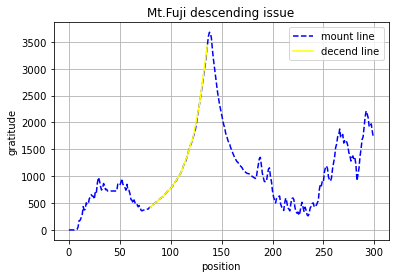

In [ ]:
plot_descent_fuji(fuji, 136)

## 【問題6】初期値の変更

In [ ]:
position = []
for i in range(len(fuji[:,0])):
    position.append(descent_fuji(i))


In [ ]:
position

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9, 7],
 [10, 4],
 [11],
 [12, 9, 7],
 [13, 11],
 [14, 6],
 [15],
 [16],
 [17, 11],
 [18],
 [19],
 [20, 15],
 [21, 19],
 [22, 20, 15],
 [23],
 [24],
 [25],
 [26, 18],
 [27],
 [28, 19],
 [29, 24],
 [30],
 [31],
 [32],
 [33, 32],
 [34, 29, 24],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48, 42],
 [49],
 [50],
 [51, 49],
 [52, 48, 42],
 [53],
 [54],
 [55],
 [56],
 [57, 52, 48, 42],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64, 61],
 [65],
 [66],
 [67],
 [68],
 [69, 68],
 [70],
 [71],
 [72],
 [73, 72],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79, 78],
 [80],
 [81, 80],
 [82, 81, 80],
 [83, 82, 81, 80],
 [84, 83, 82, 81, 80],
 [85, 84, 83, 82, 81, 80],
 [86, 85, 84, 83, 82, 81, 80],
 [87, 86, 85, 84, 83, 82, 81, 80],
 [88, 87, 86, 85, 84, 83, 82, 81, 80],
 [89, 88, 87, 86, 85, 84, 83, 82, 81, 80],
 [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80],
 [91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 

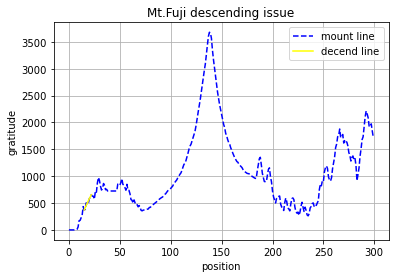

In [ ]:
plot_descent_fuji(fuji, 22)

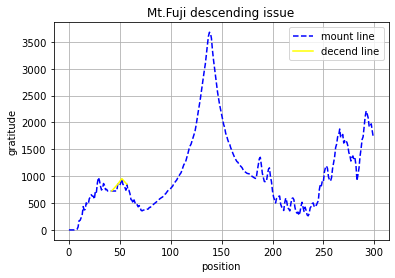

In [ ]:
plot_descent_fuji(fuji, 57)

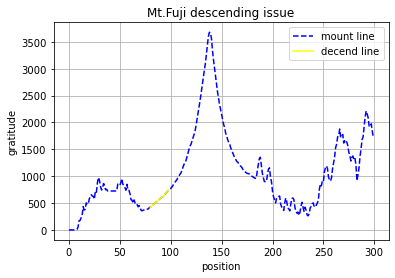

In [ ]:
plot_descent_fuji(fuji, 98)

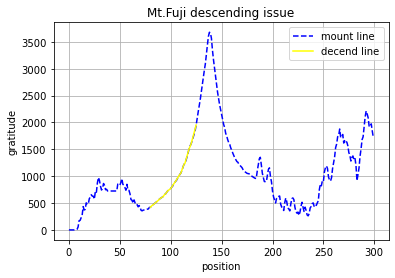

In [ ]:
plot_descent_fuji(fuji, 125)

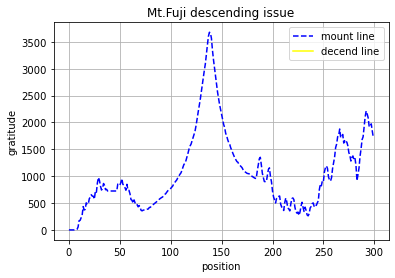

In [ ]:
plot_descent_fuji(fuji, 150)

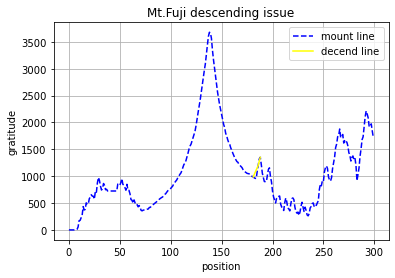

In [ ]:
plot_descent_fuji(fuji, 188)

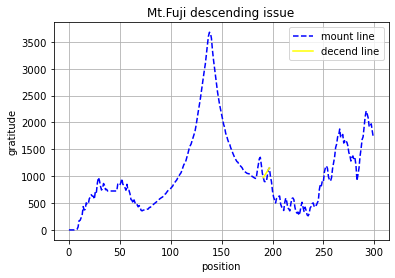

In [ ]:
plot_descent_fuji(fuji, 197)

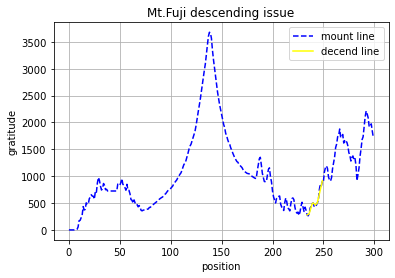

In [ ]:
plot_descent_fuji(fuji, 249)

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

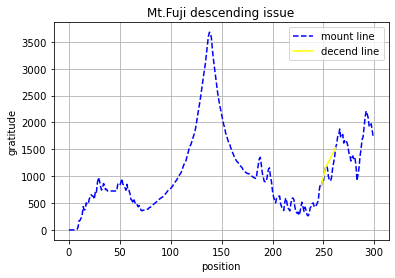

In [ ]:
# 学習率を0.05で実行する。現在地点=262。
plot_descent_fuji(fuji, 262, alpha = 0.05)
# 学習が速すぎて、山稜を正しくたどってくれず、谷を越えてしまった。

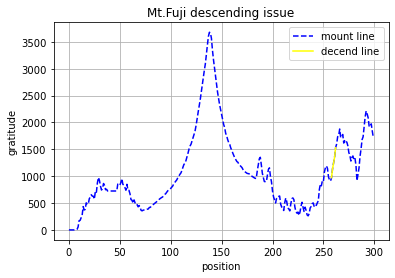

In [ ]:
# 学習率を0.005で実行する。。現在地点=262。
plot_descent_fuji(fuji, 262, alpha = 0.005)
# 最適な速度で学習してくれ、谷を越えず適切なラインを下った。

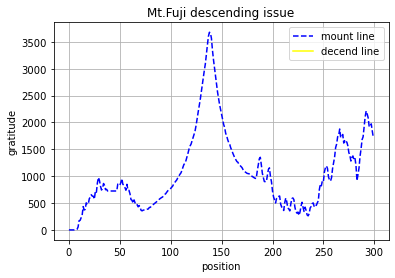

In [ ]:
# 学習率を0.0005で実行する。。現在地点=288。
plot_descent_fuji(fuji, 288, alpha = 0.0005)
# 全然学習が進まない。

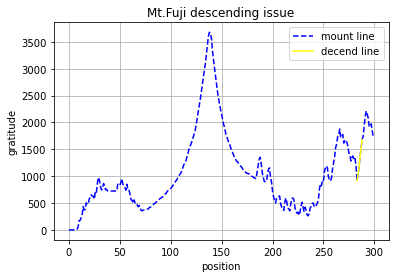

In [ ]:
# 学習率を0.005で実行する。。現在地点=288．
plot_descent_fuji(fuji, 288, alpha = 0.005)
# 最適な速度で学習してくれる。